## Agenda
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis and some Feature Engineering</a></li>
</ul>

<a id='intro'></a>
# Introduction

In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# To display all the columns and the rows ( regardless of their number or their width )
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

# For feature Engineering
from cyclical import cyclical

%matplotlib inline

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')

# To remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('retard-hassiba2019.xlsx')
df.head()

,Train,Trains,Rame,Departure_time,Departure_delay,Motifs,Arrival_time,Arrival_delay,Date,Destination,Line,Month,weekday,Holiday,Code_cir,Direction,Season
0,803,803,A.EX,06:30:00,0,NaN,06:55:00,0.0,2019-01-01,Tunis-Nabeul,Ligne 10,Janvier,Mardi,oui,Q,Impair,Hiver
1,805,805,A.EX,06:50:00,5,Att rame,07:57:00,2.0,2019-01-01,Tunis-Nabeul,Ligne 10,Janvier,Mardi,oui,Q,Impair,Hiver
2,807,807,A.EX,09:30:00,0,NaN,10:29:00,8.0,2019-01-01,Tunis-Nabeul,Ligne 10,Janvier,Mardi,oui,Q,Impair,Hiver
3,809,809,A.EX,10:45:00,25,Att rame,11:52:00,19.0,2019-01-01,Tunis-Nabeul,Ligne 10,Janvier,Mardi,oui,Q,Impair,Hiver
4,811,811,A.EX,12:10:00,0,NaN,13:11:00,3.0,2019-01-01,Tunis-Nabeul,Ligne 10,Janvier,Mardi,oui,Q,Impair,Hiver


In [3]:
df.shape

(29088, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29088 entries, 0 to 29087
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Train                29088 non-null  object        
 1   Trains               29088 non-null  object        
 2   Rame                 28088 non-null  object        
 3   Departure_time       29087 non-null  object        
 4   Departure_delay      22698 non-null  object        
 5   Motifs               7718 non-null   object        
 6   Arrival_time         29086 non-null  object        
 7   Arrival_delay        23841 non-null  float64       
 8   Date                 29088 non-null  datetime64[ns]
 9   Destination          29088 non-null  object        
 10  Line                 29088 non-null  object        
 11  Month                29088 non-null  object        
 12  weekday              29088 non-null  object        
 13  Holiday              29088 non-

In [5]:
# NaNs Percentages
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Motifs                 73.466722
Departure_delay        21.967822
Arrival_delay          18.038366
Rame                    3.437844
Arrival_time            0.006876
Departure_time          0.003438
Train                   0.000000
weekday                 0.000000
Direction               0.000000
Code_cir                0.000000
Holiday                 0.000000
Date                    0.000000
Month                   0.000000
Line                    0.000000
Destination             0.000000
Trains                  0.000000
Season                  0.000000
dtype: float64

## **we can see that the data have the following issues:**

* 1) columns that have the same meaning ( or have the same info so i will drop one of them ):**
    - Train, Trains ( we will use `Train` and drop `Trains` )
   
* 2) columns has many NaNs:**
   - Motifs ( but we will keep it )
   
* 3) Useless Columns:**
   - Date 
   - Departure_time
   - Arrival_time
   - Rame
   
* 4) Columns that have wrong datatype:**
   - Departure_delay
   
_Note:_
   - Here we can see that the `Arrival_delay` column gives the same meaning that the `Interval` column gives. And As we are trying to build a Regression model, we should keep `Arrival_delay` column only.
   - Also I want to mention here that i will work only on four destinations `Tunis-Nabeul`, `Tunis-Sousse`, `Tunis-Tozeur`,and `Tunis-Sfax`.

<a id='cleaning'></a>
# Cleaning

In [6]:
# According to the notes above
df.drop(columns=['Trains', 'Rame', 'Date', 'Departure_time', 'Arrival_time'], inplace= True)

to_take = ['Tunis-Nabeul', 'Tunis-Sousse', 'Tunis-Tozeur', 'Tunis-Sfax']
df = df[df['Destination'].isin(to_take)]

- Test

In [7]:
df.columns

Index(['Train', 'Departure_delay    ', 'Motifs', 'Arrival_delay',
       'Destination', 'Line', 'Month', 'weekday', 'Holiday', 'Code_cir',
       'Direction', 'Season'],
      dtype='object')

Before keep going let's make evey column name begins with a capital letter and has no spaces

In [8]:
# We can see that Departure time column has an extra spaces let's remove it
new_names = {}
for col in df.columns:
    new_name = col.capitalize().strip()
    new_names[col] = new_name
    
df.rename(columns=new_names, inplace=True)

- Test

In [9]:
df.columns

Index(['Train', 'Departure_delay', 'Motifs', 'Arrival_delay', 'Destination',
       'Line', 'Month', 'Weekday', 'Holiday', 'Code_cir', 'Direction',
       'Season'],
      dtype='object')

Now let's contiue our work :)

In [10]:
# According to the forth note
df['Departure_delay'] = pd.to_numeric(df['Departure_delay'], errors='coerce')

- Test

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12350 entries, 0 to 29087
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Train            12350 non-null  object 
 1   Departure_delay  9152 non-null   float64
 2   Motifs           3278 non-null   object 
 3   Arrival_delay    9562 non-null   float64
 4   Destination      12350 non-null  object 
 5   Line             12350 non-null  object 
 6   Month            12350 non-null  object 
 7   Weekday          12350 non-null  object 
 8   Holiday          12350 non-null  object 
 9   Code_cir         12350 non-null  object 
 10  Direction        12350 non-null  object 
 11  Season           12350 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [12]:
df.shape

(12350, 12)

Before jumpying to EDA let's make the final touch (Convert from French to English)

In [13]:
df['Line'] = df['Line'].str.replace('Ligne','Line')

df['Month'] = df['Month'].replace({'Janvier':'Jan', 'Février':'Feb', 'Mars':'Mar', 'Avril':'Apr', 'Mai':'May',
                                    'Juin':'Jun', 'Juillet':'Jul', 'Août':'Aug', 'Septembre':'Sep', 'Octobre':'Oct',
                                    'Novembre':'Nov', 'Décembre':'Dec'})

df['Weekday'] = df['Weekday'].replace({'Samedi':'Sat', 'Dimanche':'Sun', 'Lundi':'Mon', 'Mardi':'Tues',
                                       'Mercredi':'Wed', 'Jeudi':'Thur', 'Vendredi':'Fri'})

df['Holiday'] = np.where(df['Holiday']=='non', 'No', 'Yes')

df['Direction'] = df['Direction'].replace({'Impair':'Odd', 'Pair':'Even'})

df['Season'] = df['Season'].replace({'Hiver':'Winter', 'été':'Summer'})

- Test

In [14]:
df.head()

,Train,Departure_delay,Motifs,Arrival_delay,Destination,Line,Month,Weekday,Holiday,Code_cir,Direction,Season
0,803,0.0,NaN,0.0,Tunis-Nabeul,Line 10,Jan,Tues,Yes,Q,Odd,Winter
1,805,5.0,Att rame,2.0,Tunis-Nabeul,Line 10,Jan,Tues,Yes,Q,Odd,Winter
2,807,0.0,NaN,8.0,Tunis-Nabeul,Line 10,Jan,Tues,Yes,Q,Odd,Winter
3,809,25.0,Att rame,19.0,Tunis-Nabeul,Line 10,Jan,Tues,Yes,Q,Odd,Winter
4,811,0.0,NaN,3.0,Tunis-Nabeul,Line 10,Jan,Tues,Yes,Q,Odd,Winter


### Now it's time to deal with NaNs

In [15]:
# NaNs Percentages
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Motifs             73.457490
Departure_delay    25.894737
Arrival_delay      22.574899
Train               0.000000
Destination         0.000000
Line                0.000000
Month               0.000000
Weekday             0.000000
Holiday             0.000000
Code_cir            0.000000
Direction           0.000000
Season              0.000000
dtype: float64

* We can see that there is NaNs in:
   - _Numerical Columns:_ Departure_delay, Arriving_delay
   - _Categorical Columns:_ Motifs, Rame

_Before Anything, Let's build some hepling functions._

In [16]:
# Helping Functions
def Histo(data, x, ax=None, kde=False):
    # Main plot
    ax = sns.distplot(data[x], ax=ax, kde=kde, color='blue')
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel('Number of Trains', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
#===========================================================================================================================#
def BoxPlot(data, x, ax=None, hue=None):
    # Main plot
    ax = sns.boxplot(data=data, x=x, ax=ax, hue=hue)
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    # Adding legend
    if hue:
        ax.legend(prop={"size":13}, frameon=True, shadow=True);
#===========================================================================================================================#   
def CountPlot(data, x, hue=None, ax=None, color =None):
    # Main plot
    ax = sns.countplot(data=data, x=x, ax=ax, hue=hue, color=color)
    
    # Looping over each column
    for patch in ax.patches:
        loc    = patch.get_x()
        height = patch.get_height()
        width  = patch.get_width()
        
        ax.text(loc+width/2, height+3, str(height), weight='bold', ha="center", fontsize=15)
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, fontsize=10)
        
    ax.set_ylabel('Number of Users', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    
    
    # Adding legend
    if hue:
        ax.legend(labels=list(dataFrame[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);
#==========================================================================================================================#
def ScatterPlot(data, x, y, ax=None, hue=None):
    # Main plot
    ax = sns.scatterplot(data=data, x=x, y=y, ax=None, hue=None)
    
    # Adding title
    ax.set_title(f"{x} Vs {y} Correlation\n Corr={data[x].corr(data[y])}", 
          fontsize=15)
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel(y, fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    
    # Adding legend
    if hue:
        ax.legend(prop={"size":13}, frameon=True, shadow=True);

**_Numerical Columns_**

$Exploring Phase$

_Departure delay_

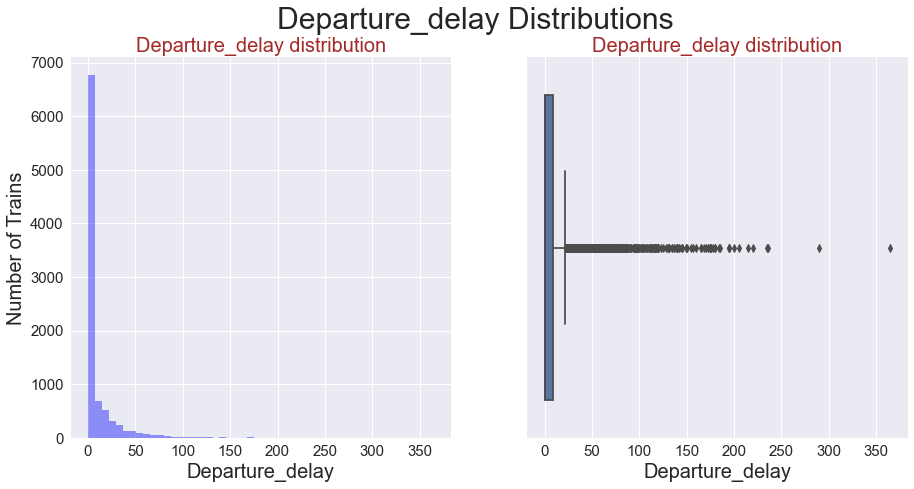

In [17]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Departure_delay Distributions', fontsize=30)

ax = plt.subplot(121)
ax = Histo(df, 'Departure_delay', ax=ax)

ax = plt.subplot(122)
BoxPlot(df, 'Departure_delay', ax=ax)

* We can see the following:
   - Most of the trains are leaving on time which makes the distribution skewed to the right. 
   - Existence of outliers (Departure delay of more than 60 minutes). 

* What i am going to do:
   - I can't remove the outliers before investigating them a little more to decide wether they gonna help my model or not.

In [18]:
# How Many
df[df['Departure_delay']>60].shape[0]

276

> they are a relatively small number. But we need first to determine if they have a valuable info or not.

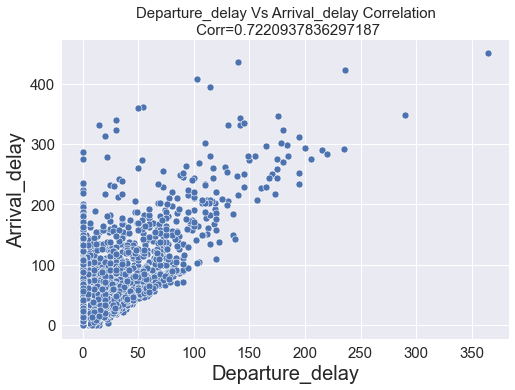

In [19]:
df_temp = df[df['Departure_delay']>60]
ScatterPlot(df, 'Departure_delay', 'Arrival_delay', ax=None, hue=None)

> Obviously there is a strong correlation betwen Arrival delay and departure delay outliers. which is reasonable by the way (**the longer the trains are late, the more delayed they will arrive**). So i will keep them.

Arrival delay

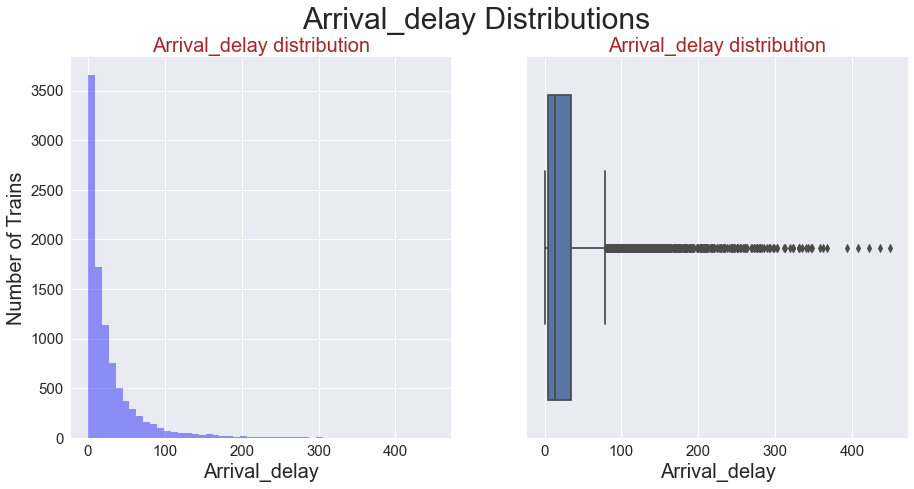

In [20]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Arrival_delay Distributions', fontsize=30)

ax = plt.subplot(121)
ax = Histo(df, 'Arrival_delay', ax=ax)

ax = plt.subplot(122)
BoxPlot(df, 'Arrival_delay', ax=ax)

> We can see the following:
- Most of the trains are Arrival on time which makes the distribution also skewed to the right. 

$Cleaning Phase$

**After Inevestigating Outliers Let's deal with their NaNs**

In [21]:
df[['Departure_delay', 'Arrival_delay']].isnull().sum()

Departure_delay    3198
Arrival_delay      2788
dtype: int64

We can't train the model on a fake data so i will drop the NaNs in Arrving delay column

In [22]:
df = df[df['Arrival_delay'].notna()].copy()

- Test

In [23]:
df[['Departure_delay', 'Arrival_delay']].isnull().sum()

Departure_delay    412
Arrival_delay        0
dtype: int64

Now Let's deal with `Departure_delay` NaNs

In [24]:
df['Departure_delay'].mean(), df['Departure_delay'].median()

(8.72360655737705, 0.0)

> Because of outliers, we will fill NaNs with the median.

In [25]:
df['Departure_delay'].fillna(df['Departure_delay'].median(), inplace=True)

- **Test**

In [26]:
df[['Departure_delay', 'Arrival_delay']].isnull().sum()

Departure_delay    0
Arrival_delay      0
dtype: int64

> Good.

**_CAT Columns_**

Let's take a close look

In [27]:
df.select_dtypes('object').nunique().sort_values()

Holiday          2
Direction        2
Code_cir         3
Season           3
Destination      4
Line             4
Weekday          7
Month           12
Train           55
Motifs         281
dtype: int64

In [28]:
# we will divide the categorical data into two groups
## columns that have small number of unique values and others are not (threshold = 10)
small_unique = df.select_dtypes('object').nunique()[(df.select_dtypes('object').nunique()<10)].index

In [29]:
len(small_unique)

7

**CAT -Small unique-**

_Explore Phase_

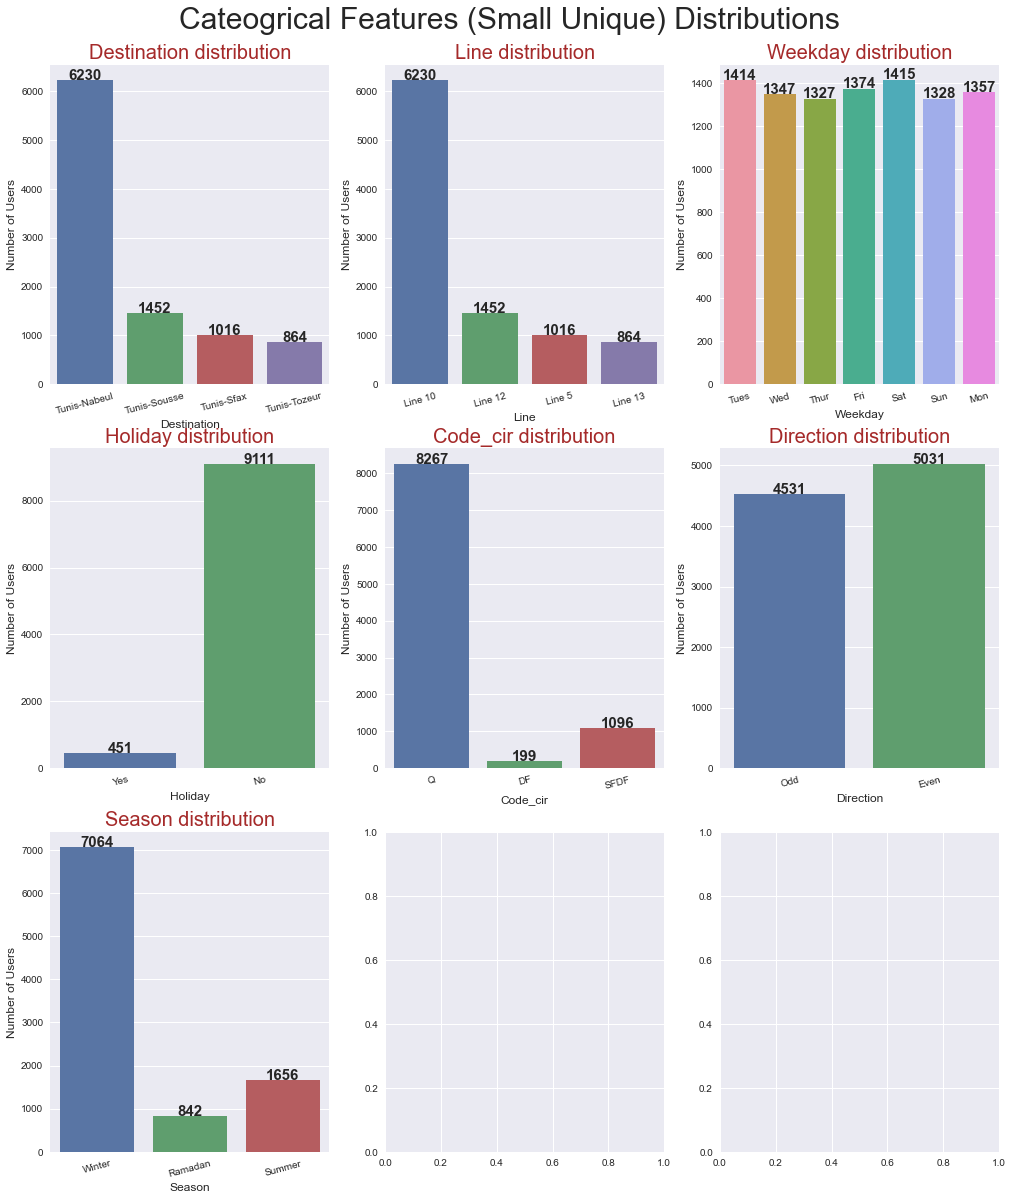

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,20))
fig.suptitle('Cateogrical Features (Small Unique) Distributions', fontsize=30, y=0.92)
for i, col in enumerate(small_unique):
    CountPlot(df, col, ax=axes[i//3,i-(i//3)*3])

## **Summary:**

* 1) Columns that are nearly uniformly distributed:**
   - Weekday 
   - Direction
  
   
* 2) Columns that have an acceptable unbalance in its values:**
   - Line
   - Destination
   
* 3) Columns that is very unbalanced (needs more investigation to measure their usefulness):**
   - Holiday
   - Code_cir
   - Season

   
_Note:_
   - We can see that `Season` Column has only three values ("Winter", "Ramadan", "Summer"). We need to see if all the Months exist or not because if so. We can replace this column by another full one (but before removing it we will investigate wether being in Ramadan can affect anything or not).

_Cleaning Phase_

> Now let's deal with their NaNs

In [31]:
df[small_unique].isnull().sum()

Destination    0
Line           0
Weekday        0
Holiday        0
Code_cir       0
Direction      0
Season         0
dtype: int64

> Clean

**CAT -Large unique-**

In [32]:
large_unique = set(df.columns)-set(list(small_unique)+['Arrival_delay', 'Departure_delay'])
df[large_unique].nunique()

Month      12
Motifs    281
Train      55
dtype: int64

> _As 'Month' has a relatively small unique values I will visualize it separately._

_Exploring Phase_

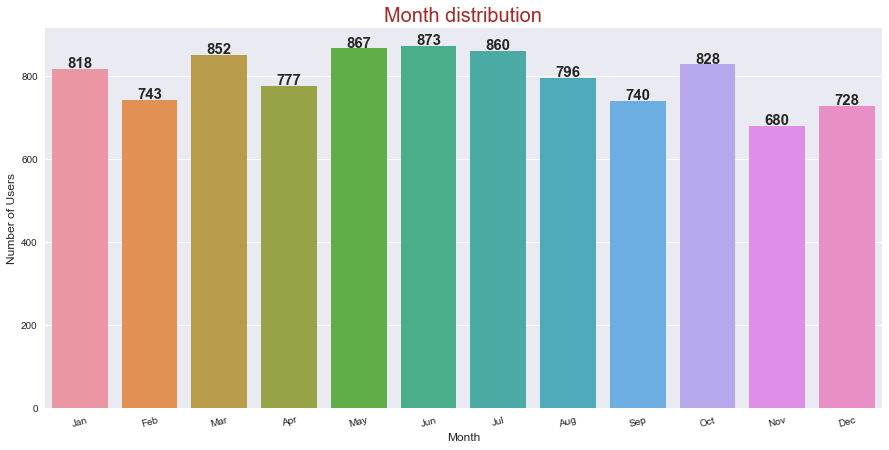

In [33]:
plt.figure(figsize=(15,7))
CountPlot(df, 'Month')

## **Summary:**

> **1) Month column is nearly uniformly distributed:**
  

_Note:_
   - To complete the discussion about the `Season` Column, we can see that all the months exist so we need to create a new full Season column. Then investigate the two columns together to get a useful info from them both.

_Cleaning Phase_

In [34]:
# According to the last note 
df['Season'] = df['Month'].copy()

month_to_season = [(['Dec', 'Jan', 'Feb'], 'Winter'), (['Mar', 'Apr', 'May'], 'Spring'), 
                   (['Jun', 'Jul', 'Aug'], 'Summer'), (['Sep', 'Oct', 'Nov'], 'Autumn')]

for months, season in month_to_season:
    mask = df['Season'].isin(months)
    df.loc[mask,'Season'] = season

> We've created the full Season Column successfully. Later on, We will try to extract the important features from them both.

But before that let's deal with their NaNs

In [35]:
df[['Month', 'Season']].isnull().sum()

Month     0
Season    0
dtype: int64

> Clean.

Let's deal with other `Large_unique` columns

In [36]:
large_unique_rem = set(large_unique)-set(['Month'])
df[large_unique_rem].nunique()

Motifs    281
Train      55
dtype: int64

_Exploring Phase_

In [37]:
100*df['Train'].value_counts()/df.shape[0]

0005058    3.723070
805        3.566200
819        3.482535
814        3.440703
0513055    3.440703
1305072    3.419787
0005087    3.409329
811        3.367496
1205052    3.346580
820        3.262916
1005056    3.200167
808        3.022380
825        3.011922
1005050    3.011922
809        2.928258
812        2.907342
0512089    2.813219
1205054    2.792303
807        2.740013
816        2.740013
810        2.708638
806        2.677264
804        2.624974
803        2.624974
813        2.614516
815        2.572684
0513093    2.394896
0512079    2.300774
0510081    1.955658
1305096    1.736038
818        1.296800
802        1.087639
817        0.951684
821        0.951684
1205066    0.815729
0512081    0.721606
1205054    0.648400
0512075    0.606568
1305090    0.596110
823        0.596110
0512051    0.522903
0510079    0.439239
0005065    0.313742
0005079    0.313742
1205075    0.313742
822        0.313742
0005082    0.313742
1205080    0.303284
827        0.271910
0510077    0.261452


In [38]:
100*df['Motifs'].value_counts()/df.shape[0]

Att rame                                                                 16.105417
Att Rame                                                                  6.515373
Cant tr5/73                                                               1.108555
De Sfax                                                                   0.972600
Cant tr5/98                                                               0.773897
Sc                                                                        0.752981
Cant tr 5/98                                                              0.554277
Att tr 5/13/93                                                            0.501987
DM                                                                        0.460155
Cant tr 5/73                                                              0.313742
Cant tr5/13/55                                                            0.292826
Cant tr5/12/89                                                            0.198703
 De 

> As these Columns has many unique values, So I will use Target Encoding to deal with them ( After spliting the data to train and test sets )

_Cleaning Phase_

In [39]:
df[large_unique_rem].isnull().sum()

Motifs    6288
Train        0
dtype: int64

In [40]:
df['Motifs'].fillna('Unknown', inplace=True)

<font color='red'>
<h2><center> Cleaning Test </center></h2>

In [41]:
df.isnull().sum()

Train              0
Departure_delay    0
Motifs             0
Arrival_delay      0
Destination        0
Line               0
Month              0
Weekday            0
Holiday            0
Code_cir           0
Direction          0
Season             0
dtype: int64

In [42]:
# Let's save it
df.to_csv('clean_data.csv', index=False)

<a id='eda'></a>
<font color='green'>
<h2><center> Now let's dig deeper in EDA </center></h2>

In [43]:
df = pd.read_csv('clean_data.csv')

### Is there a specific relationship between Departure_delay and The Arrival_delay ?

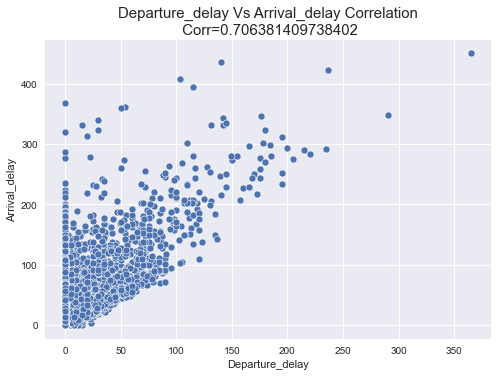

In [44]:
sns.scatterplot(data=df, x='Departure_delay', y='Arrival_delay')
plt.title(f"Departure_delay Vs Arrival_delay Correlation\n Corr={df['Departure_delay'].corr(df['Arrival_delay'])}", 
          fontsize=15);

> We can see that there is a strong correlation between Departure delay and Arrival delay.

### Is the Arrival_delay affected by wether the day is a holiday or not ?

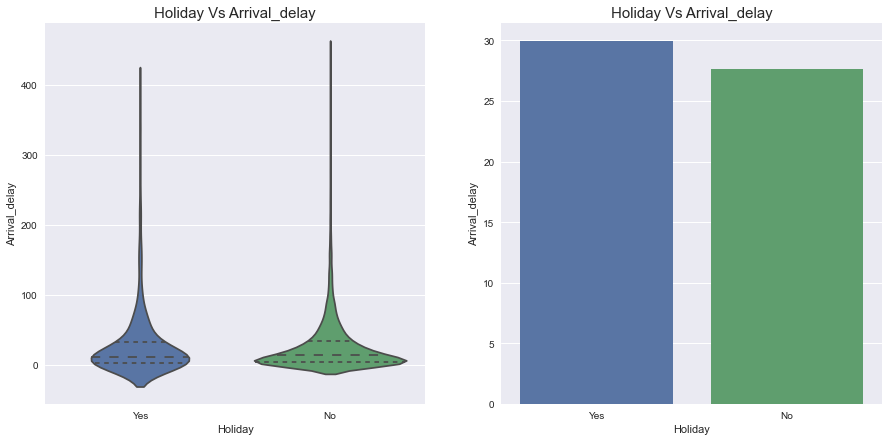

In [45]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Holiday', y='Arrival_delay', inner='quartile')
ax.set_title("Holiday Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Holiday', y='Arrival_delay', ci=None)
ax.set_title("Holiday Vs Arrival_delay", fontsize=15);

> The Average and median of Arrival_delay in Holidays is lower. So this feature can help in Modeling

_Feature Engineering_

In [46]:
df['Holiday'], _ = df['Holiday'].factorize()

### Is there a specific day that affects the Arrival_delay?

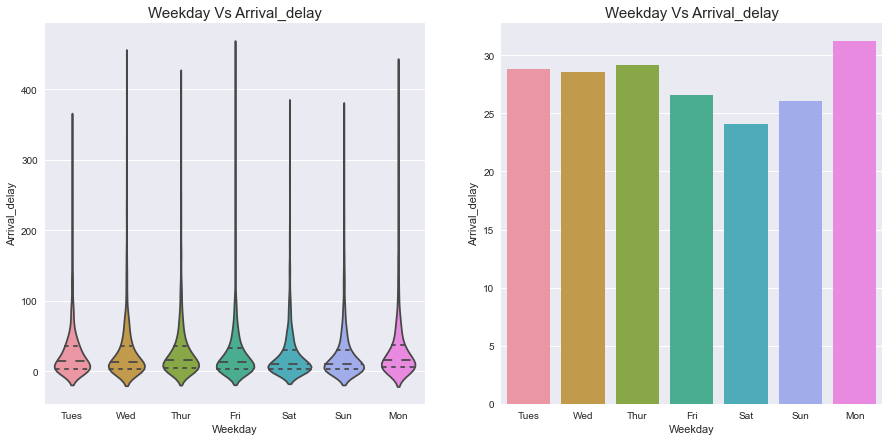

In [47]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Weekday', y='Arrival_delay', inner='quartile')
ax.set_title("Weekday Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Weekday', y='Arrival_delay', ci=None)
ax.set_title("Weekday Vs Arrival_delay", fontsize=15);

> Although the averages are very close but these differences may help.

_Feature Engineering_

In [48]:
n_days = 7
days, _ = list(df['Weekday'].factorize())
encoded_days = cyclical.encode(days, n_days)

df['Weekday_sin'] = encoded_days[0]
df['Weekday_cos'] = encoded_days[1]

df.drop('Weekday', axis=1, inplace=True)

### Is the Arrival_delay is affected by which Month we are in ?

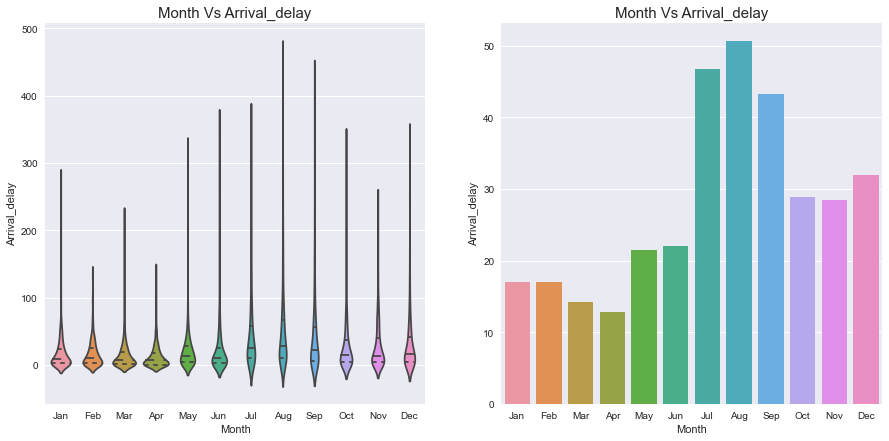

In [49]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Month', y='Arrival_delay', inner='quartile')
ax.set_title("Month Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Month', y='Arrival_delay', ci=None)
ax.set_title("Month Vs Arrival_delay", fontsize=15);

> Yeah, Month may also help.

_Feature Engineering_

In [50]:
n_Months = 12
Months, _ = list(df['Month'].factorize())
encoded_Months = cyclical.encode(Months, n_Months)

df['Month_sin'] = encoded_Months[0]
df['Month_cos'] = encoded_Months[1]

df.drop('Month', axis=1, inplace=True)

### What about Seasons ?

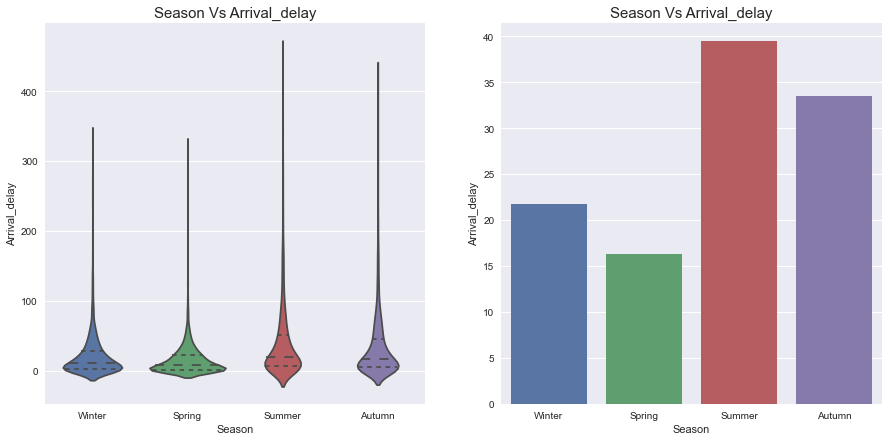

In [51]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Season', y='Arrival_delay', inner='quartile')
ax.set_title("Season Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Season', y='Arrival_delay', ci=None)
ax.set_title("Season Vs Arrival_delay", fontsize=15);

* Here we can see that 
   - When It's summer the Arrival_delay tends to be relatively large. 
   - Also we noticed that the two columns (Season and Season_v2) are conveying the same message. So i will drop `Season` column.

**_Feature Engineering_**

In [52]:
n_Seasons = 4
Seasons, _ = list(df['Season'].factorize())
encoded_Seasons = cyclical.encode(Seasons, n_Seasons)

df['Season_sin'] = encoded_Seasons[0]
df['Season_cos'] = encoded_Seasons[1]

df.drop('Season', axis=1, inplace=True)

### Does the destination Affect the Arrival_delay?

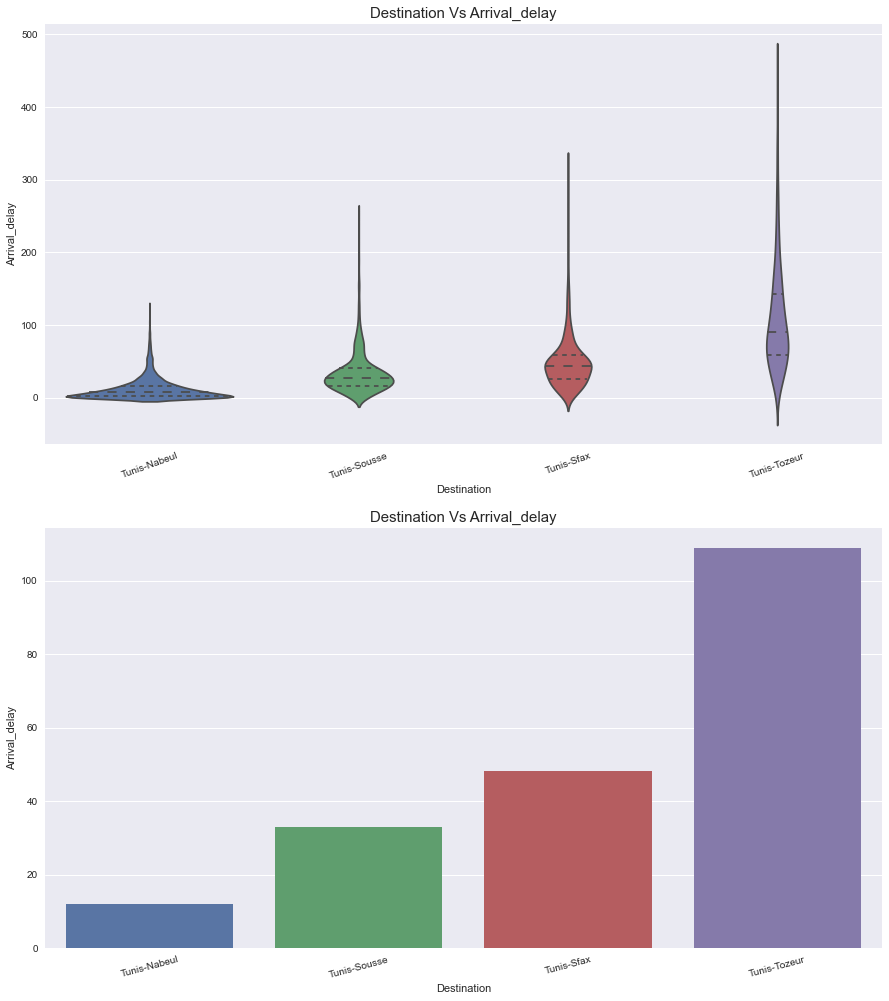

In [53]:
plt.figure(figsize=(15,17))

plt.subplot(211)
ax = sns.violinplot(data=df, x='Destination', y='Arrival_delay', inner='quartile')
ax.set_title("Destination Vs Arrival_delay", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.subplot(212)
ax = sns.barplot(data=df, x='Destination', y='Arrival_delay', ci=None)
ax.set_title("Destination Vs Arrival_delay", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

> Yeah, According to the previous plot some destination has lower Arrival_delay than others.

_Feature Engineering_

In [54]:
# Removing any spaces
df['Destination'] = df['Destination'].str.replace(' ', '')

# The distance in each distination
dest_to_Len = [('Tunis-Nabeul', 76.3), ('Tunis-Sfax', 269.249), ('Tunis-Sousse', 162.222), ('Tunis-Tozeur', 234.100)]

for destination,  length in dest_to_Len:
    mask = df['Destination'] == destination
    df.loc[mask,'Destination_Len'] = length
    
# Number of stops along the road
dest_to_stops = [('Tunis-Nabeul', 26), ('Tunis-Sfax', 41), ('Tunis-Sousse', 32),('Tunis-Tozeur', 58)]

for destination,  stops in dest_to_stops:
    mask = df['Destination'] == destination
    df.loc[mask,'Nbr_Stops'] = stops

# The distance between stops along the road
df['dist_bet_Stops'] = df['Destination_Len']/df['Nbr_Stops']

### Does the Line Number Affect the Arrival_delay?

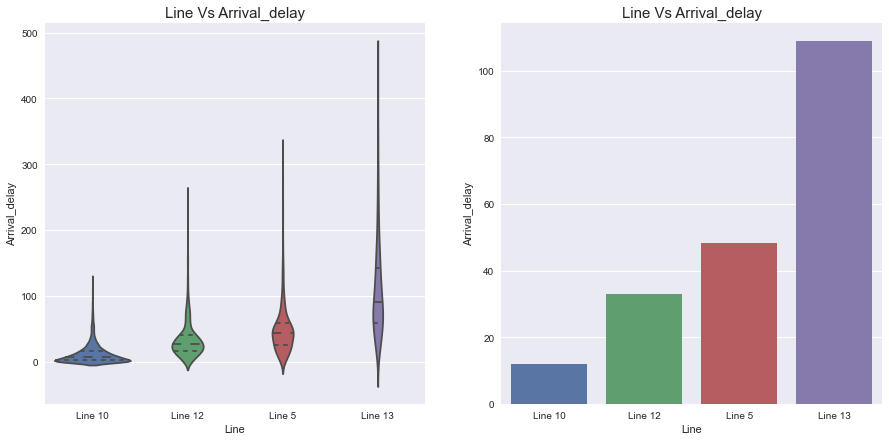

In [55]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Line', y='Arrival_delay', inner='quartile')
ax.set_title("Line Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Line', y='Arrival_delay', ci=None)
ax.set_title("Line Vs Arrival_delay", fontsize=15);

> Here we can see there is a variety in arrival_delay averages so it may help the model.

_Feature Engineering_

> We will deal with it with Target Encoding

### What about Code_Cir?

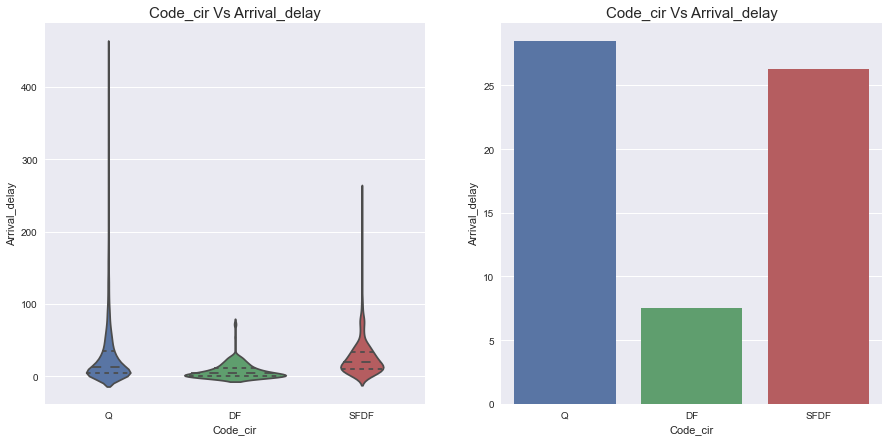

In [56]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Code_cir', y='Arrival_delay', inner='quartile')
ax.set_title("Code_cir Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Code_cir', y='Arrival_delay', ci=None)
ax.set_title("Code_cir Vs Arrival_delay", fontsize=15);

> We can see that this feature may have some info to benefit the model.

_Feature Engineering_

In [57]:
# We will replace each category with it's a fraction such that
# Q: Means works all the days --> 7/7
# DF: Means works on sunday only --> 1/7 
# .. and so on
code_to_N = [('Q',1), ('DF',2/7), ('SFDF',6/7)]
for code_cir,  N in code_to_N:
    mask = df['Code_cir'] == code_cir
    df.loc[mask,'Code_cir'] = N

### Does the direction of the railway affects the Arrival delay?

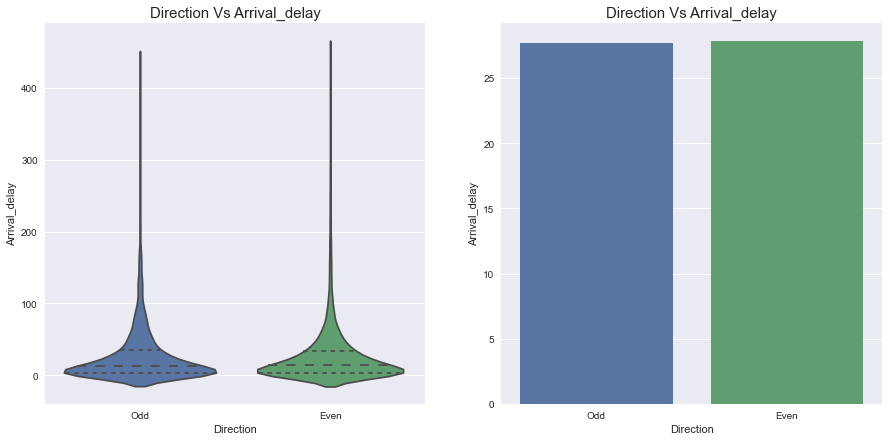

In [58]:
plt.figure(figsize=(15,7))

plt.subplot(121)
ax = sns.violinplot(data=df, x='Direction', y='Arrival_delay', inner='quartile')
ax.set_title("Direction Vs Arrival_delay", fontsize=15);

plt.subplot(122)
ax = sns.barplot(data=df, x='Direction', y='Arrival_delay', ci=None)
ax.set_title("Direction Vs Arrival_delay", fontsize=15);

> We can't say for sure that this column is a useless feature. So i will keep it.

_Feature Engineering_

In [59]:
df['Direction'], _ = df['Direction'].factorize()

<a id='eda'></a>
<font color='green'>
<h2><center> Now Let's do some Multivariate Exploration to know if we can add some more useful features </center></h2>


In [60]:
# We've saved the cleaned data before
df_origin = pd.read_csv('clean_data.csv')

### Does Direction affect the relationship between Departure_delay and Arrival_delay?

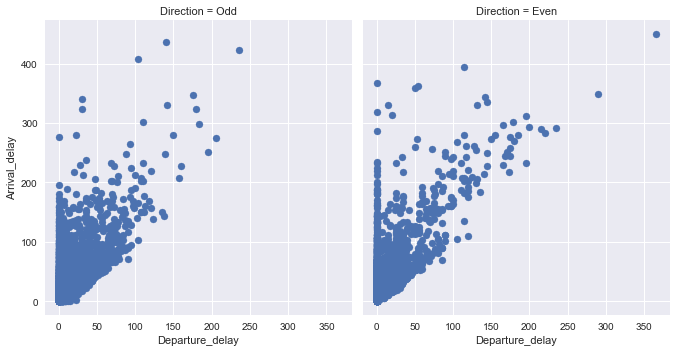

In [61]:
g = sns.FacetGrid(data = df_origin, col = 'Direction', height = 5, aspect= 0.95)
g.map(plt.scatter,'Departure_delay', 'Arrival_delay');

> Here it's obvious that the Direction does not change the positive relationship between Departure_delay and Arrival_delay

### What About Destination?

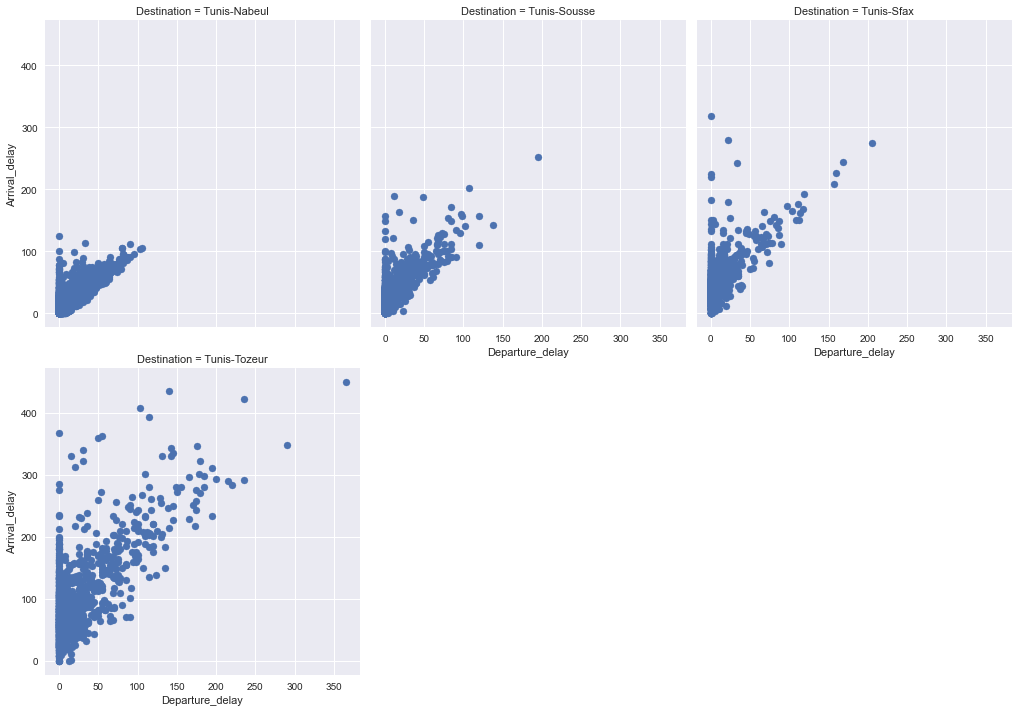

In [62]:
g = sns.FacetGrid(data = df_origin, col = 'Destination', col_wrap = 3, height = 5, aspect= 0.95)
g.map(plt.scatter,'Departure_delay', 'Arrival_delay');

> Also here there is nothing special.

### Let's take a look at them both.

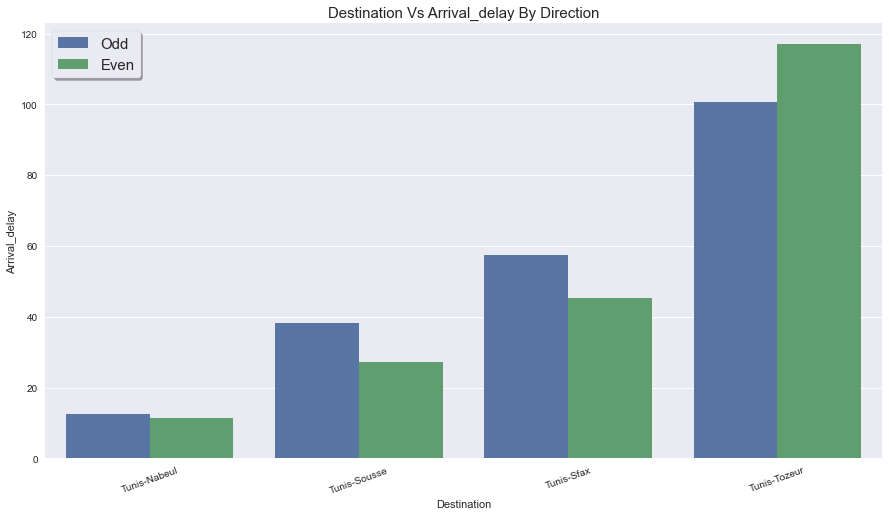

In [63]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=df_origin, x='Destination', y='Arrival_delay', hue='Direction', ci=None)
ax.set_title("Destination Vs Arrival_delay By Direction", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.legend(labels=list(df_origin['Direction'].unique()),  prop={"size":15}, frameon=True, shadow=True);

> Here we can see that the overall average of Arrival_delay for Odd Direction is larger than that for the Even one and that is what we found in the previous Bivariate Exploration. 

### Is the relationship between Arrival_delay and Departure_delay differs according to whether the day is a holiday or not?

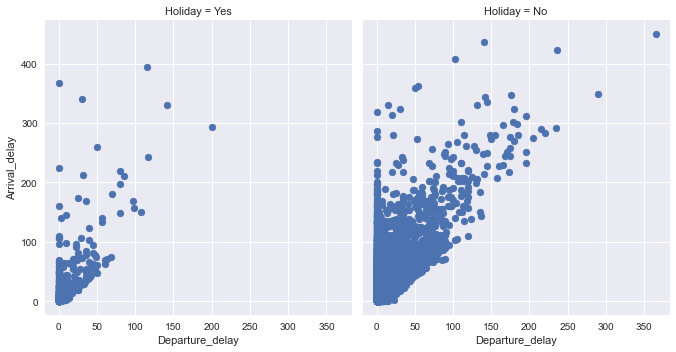

In [64]:
g = sns.FacetGrid(data = df_origin, col = 'Holiday', height = 5, aspect= 0.95)
g.map(plt.scatter,'Departure_delay', 'Arrival_delay');

> Nothing at all.

### Let's combine explore Holidays combined with Ramadan and see.

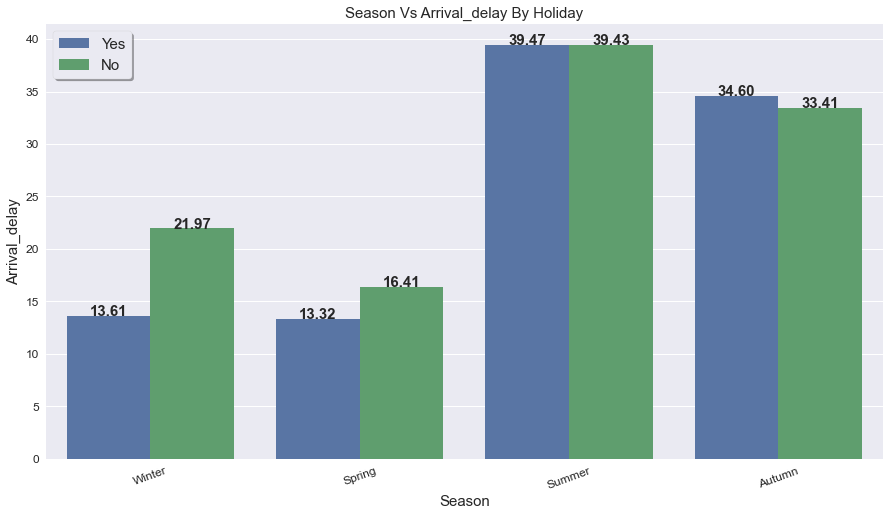

In [65]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=df_origin, x='Season', y='Arrival_delay', hue='Holiday', ci=None)
for patch in ax.patches:
    loc    = patch.get_x()
    height = patch.get_height()
    width  = patch.get_width()
        
    ax.text(loc+width/2, height, '{0:.2f}'.format(height), weight='bold', ha="center", fontsize=15)

plt.draw()

ax.set_title("Season Vs Arrival_delay By Holiday", fontsize=15)
ax.set_xlabel('Season', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, fontsize=12)
ax.set_ylabel('Arrival_delay', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(labels=list(df_origin['Holiday'].unique()),  prop={"size":15}, frameon=True, shadow=True, loc=2);

> Nothing is special.

<font color='red'>
<h2><center> Finalizing <center\><h>

In [66]:
df.shape

(9562, 18)

In [67]:
df.isnull().sum()

Train              0
Departure_delay    0
Motifs             0
Arrival_delay      0
Destination        0
Line               0
Holiday            0
Code_cir           0
Direction          0
Weekday_sin        0
Weekday_cos        0
Month_sin          0
Month_cos          0
Season_sin         0
Season_cos         0
Destination_Len    0
Nbr_Stops          0
dist_bet_Stops     0
dtype: int64

In [68]:
# Let's save it first
df.to_csv('cleaner_data.csv', index=False)

Let's drop useless columns

In [69]:
df.drop(columns=['Destination', 'Line'], inplace=True)

In [70]:
# Let's save it first
df.to_csv('cleanest.csv', index=False)

<a id='modeling'></a>
<font color='green'>
<h2><center> Now We're ready for modeling <center\><h>